In [1]:
import time
import requests
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from credentials import ff_web_login, ff_valerie_login
from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor, as_completed
from bs4 import BeautifulSoup

<!DOCTYPE html>

<html>
<head><script type="text/javascript">window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"169e250927","applicationID":"1900576,31153614","transactionName":"NVBRNRZZXUdYARILDgwaZhMNF0BRWhcUCxUbGl4IClxRW10bOQEAEkFQCQUWW0BUDg==","queueTime":0,"applicationTime":0,"agent":"","atts":""}</script><script type="text/javascript">(window.NREUM||(NREUM={})).loader_config={xpid:"XAIDV1FACQoAVFRVAQ=="};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(19),c={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(c.console=!0,o.indexOf("
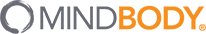

In [11]:
ff_website = 'https://clients.mindbodyonline.com/LoginLaunch?studioid=741470'
soup = BeautifulSoup(requests.get(ff_website).text, "html.parser")
soup

In [2]:
class ffchrome(Chrome):

    executable_path = '/usr/local/bin/chromedriver'
    time_to_wait = 5 # Implicit wait seconds
    ff_website = 'https://clients.mindbodyonline.com/LoginLaunch?studioid=741470'
    gym_selector = 'a.selectBox.bf-filter.selectBox-dropdown' 
    options = Options()
    # options.headless = True
    # options.add_argument("--no-startup-window")
    
    def __init__(self, gym, login, password):
        Chrome.__init__(self, self.executable_path, options=self.options) 
        Chrome.implicitly_wait(self, self.time_to_wait) 
        Chrome.get(self, self.ff_website) 
        Chrome.find_element_by_css_selector(self, self.gym_selector).click() # Expand gym location dropdown
        Chrome.find_element_by_link_text(self, gym).click() # Choose gym
        Chrome.find_element_by_id(self, 'requiredtxtUserName').send_keys(login) 
        Chrome.find_element_by_id(self, 'requiredtxtPassword').send_keys(password) 
        Chrome.find_element_by_id(self, 'btnLogin').click() # Login

def book_class(driver, class_button):
    time.sleep(2)
    driver.quit()

In [3]:
# Get credentials
yj_login = ff_web_login['login']
yj_pwd = ff_web_login['password']
val_login = ff_valerie_login['login']
val_pwd = ff_valerie_login['password']

In [4]:
# Initialize
driver1 = ffchrome('MBFC', yj_login, yj_pwd)

In [21]:
element = driver1.find_element_by_name('but2700')
print(element.get_attribute('textContent'))
# print(element.get_property('attributes')[0])

In [11]:
type(element)

selenium.webdriver.remote.webelement.WebElement

In [18]:
print(element.get_attribute('value'))

Sign Up Now
